<a href="https://colab.research.google.com/github/sollunium/python-basic/blob/main/COVID_variant_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [ ]:
df_covid = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df_test = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/tests.csv")
df_variants = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/variants/variant-epi-data.csv")
df_vc = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/variants/variant-classification.csv")


In [ ]:
sns.set(rc={'figure.figsize':(40,10)})

In [ ]:
df_variants.head(10)

,Sequence week,B.1.526 +E484K count,B.1.526 +E484K percent,B.1.526 no E484K count,B.1.526 no E484K percent,B.1.1.7 count,B.1.1.7 percent,P.1 count,P.1 percent,B.1.427 count,B.1.427 percent,B.1.429 count,B.1.429 percent,B.1.351 count,B.1.351 percent,B.1.617.2 count,B.1.617.2 percent,B.1.621 count,B.1.621 percent,B.1.1.529 count,B.1.1.529 percent,Other count,Other percent,incomplete
0,01/02/2021,3,1,31,6,4,1,0,0,2,0,6,1,0,0,0,0,0,0,0,0,486,91,NaN
1,01/09/2021,8,1,50,6,8,1,0,0,5,1,12,1,0,0,0,0,0,0,0,0,789,90,NaN
2,01/16/2021,9,2,44,11,13,3,0,0,5,1,12,3,0,0,0,0,0,0,0,0,336,80,NaN
3,01/23/2021,13,3,55,11,8,2,0,0,1,0,6,1,0,0,0,0,0,0,0,0,400,83,NaN
4,01/30/2021,61,8,121,16,23,3,0,0,11,1,14,2,1,0,0,0,0,0,0,0,544,70,NaN
5,02/06/2021,82,8,205,20,78,8,0,0,8,1,17,2,0,0,0,0,0,0,0,0,617,61,NaN
6,02/13/2021,60,6,300,28,98,9,0,0,13,1,20,2,0,0,0,0,0,0,0,0,577,54,NaN
7,02/20/2021,164,14,249,21,111,10,0,0,16,1,17,1,2,0,1,0,0,0,0,0,605,52,NaN
8,02/27/2021,203,18,255,23,147,13,0,0,5,0,20,2,0,0,0,0,0,0,0,0,484,43,NaN
9,03/06/2021,194,19,312,31,156,15,0,0,9,1,16,2,1,0,1,0,0,0,0,0,331,32,NaN


We can see there is NaN value from the incomplete, but we are not sure what exactly that is. Therefore, Drop that value.

In [ ]:
df_vc

,variant,name,count,total,percent_in_NYC
0,B.1.1.529,Omicron,12398,12915,96
1,B.1.617.2,Delta,510,12915,4
2,B.1.1.7,Alpha,0,12915,0
3,B.1.351,Beta,0,12915,0
4,B.1.427,Epsilon,0,12915,0
5,B.1.429,Epsilon,0,12915,0
6,B.1.525,Eta,0,12915,0
7,B.1.526,Iota,0,12915,0
8,B.1.621,NaN,0,12915,0
9,P.1,Gamma,0,12915,0


Drop everything except percent

In [ ]:
backup = df_variants.copy()
for i in (df_variants.columns):
  if "count" in i:
    df_variants.drop(i,axis=1, inplace =True)

df_variants.drop("incomplete",axis=1, inplace=True)
df_variants.drop("B.1.526 no E484K percent",axis=1, inplace=True)
df_variants.columns

Index(['Sequence week', 'B.1.526 +E484K  percent', 'B.1.1.7 percent',
       'P.1 percent', 'B.1.427 percent', 'B.1.429 percent', 'B.1.351 percent',
       'B.1.617.2 percent', 'B.1.621 percent', 'B.1.1.529 percent',
       'Other percent'],
      dtype='object')

Change name to Nickname so we can easily understand

In [ ]:
IndexName = ["Sequence week", "Iota", "Alpha", "Gamma", "Epsilon", "Epsilon_2", "Beta", "Delta", "B.1.621", "Omicron", "Other" ]

df_variants.columns = IndexName


df_variants= df_variants.set_index("Sequence week")
df_variants.head()

,Iota,Alpha,Gamma,Epsilon,Epsilon_2,Beta,Delta,B.1.621,Omicron,Other
Sequence week,,,,,,,,,,
01/02/2021,1,1,0,0,1,0,0,0,0,91
01/09/2021,1,1,0,1,1,0,0,0,0,90
01/16/2021,2,3,0,1,3,0,0,0,0,80
01/23/2021,3,2,0,0,1,0,0,0,0,83
01/30/2021,8,3,0,1,2,0,0,0,0,70


In [ ]:
backup= backup.set_index("Sequence week")
for i in (backup.columns):
  if not "count" in i:
    backup.drop(i,axis=1, inplace =True)
backup.drop("B.1.526 no E484K count",axis=1, inplace =True)
print(backup.head(5))

               B.1.526 +E484K count  ...  Other count
Sequence week                        ...             
01/02/2021                        3  ...          486
01/09/2021                        8  ...          789
01/16/2021                        9  ...          336
01/23/2021                       13  ...          400
01/30/2021                       61  ...          544

[5 rows x 10 columns]


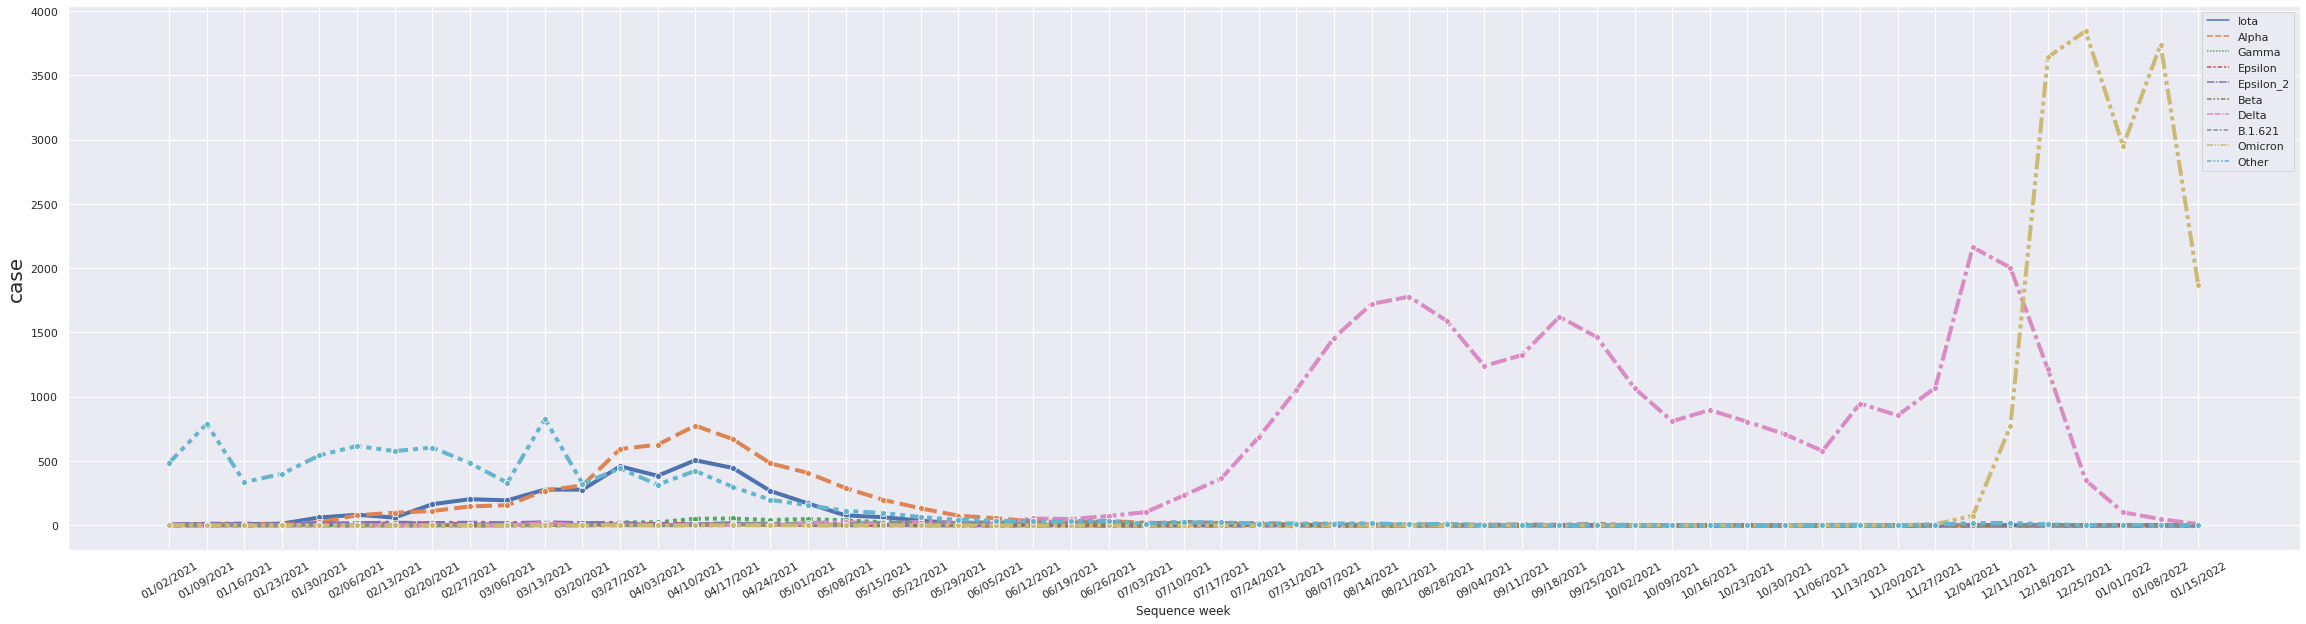

In [ ]:
backup.columns = IndexName[1:]


daily = sns.lineplot(data= backup, linewidth = 4, marker="o")
daily.set_ylabel("case", fontsize = 20)
plt.xticks(rotation=30)
plt.show()

In [ ]:
total = 0
for i in (backup):
  print(f"{i}: {backup[i].sum()} ")
  total += backup[i].sum()
print(f"total COVID cases: {total}")


Iota: 3795 
Alpha: 5698 
Gamma: 473 
Epsilon: 137 
Epsilon_2: 238 
Beta: 39 
Delta: 28572 
B.1.621: 337 
Omicron: 16891 
Other: 8807 
total COVID cases: 64987


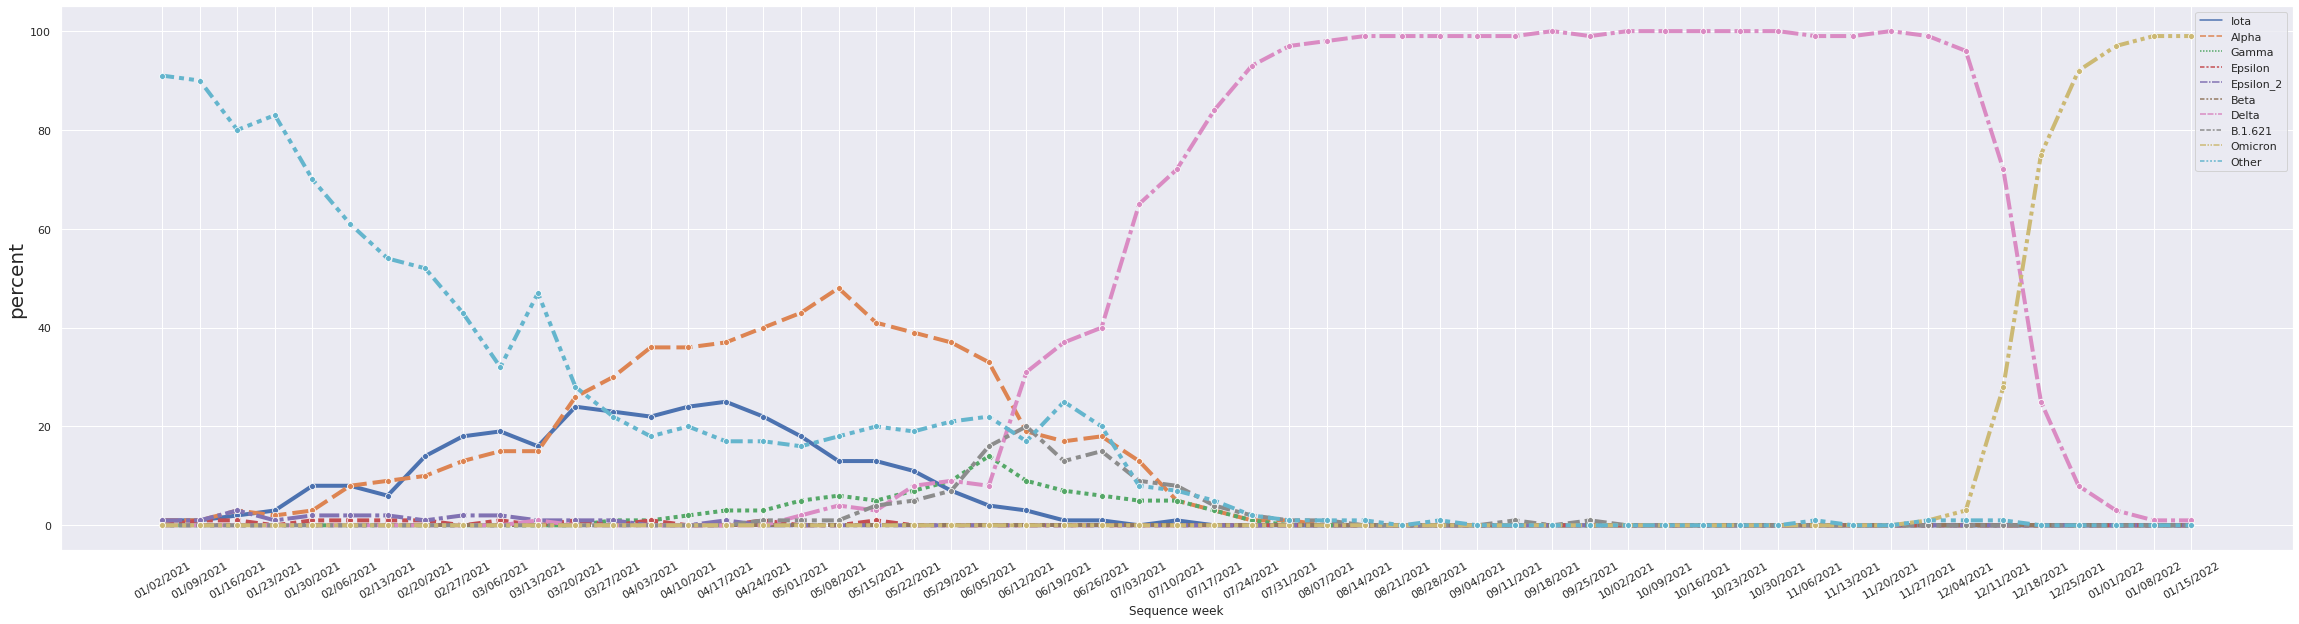

In [ ]:
x = sns.lineplot(data= df_variants, linewidth = 4, marker="o")
plt.xticks(rotation=30)
x.set_ylabel("percent", fontsize = 20)
plt.show()

**Summary:**
